## Import libraries

In [1]:
import kwant
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

import os.path
def save_image(name):
    folder = "./figures/"
    if os.path.exists(folder + name + ".png"):
        raise Exception("File already exist")
        return 0
    
    plt.savefig(folder + name + ".png", dpi=300)

## Create an “empty” tight binding system.

In [2]:
t = 1.0 # hopping energy
W = 10 # width of system
L = 10 # length of system
a = 1 # on site energy

#define square lattice
lat = kwant.lattice.square(a)

#build system
syst = kwant.Builder()
syst

## Set its matrix elements and hoppings.

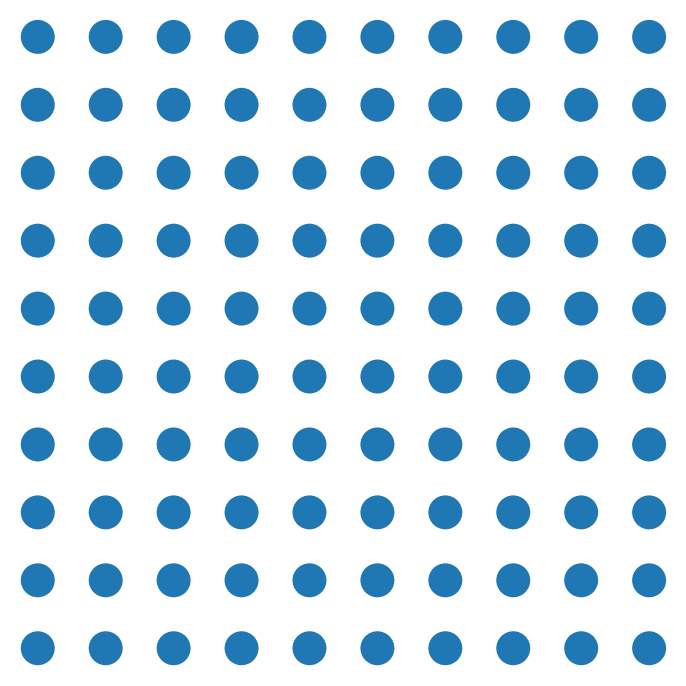

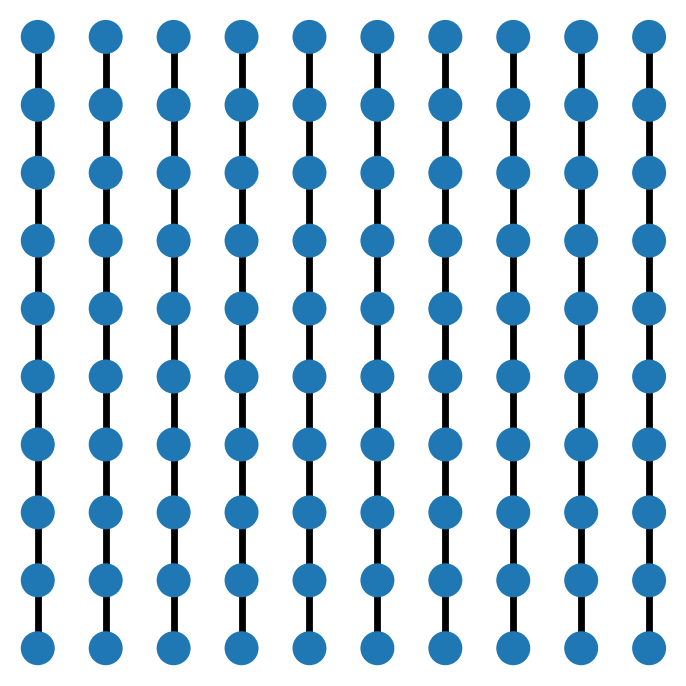

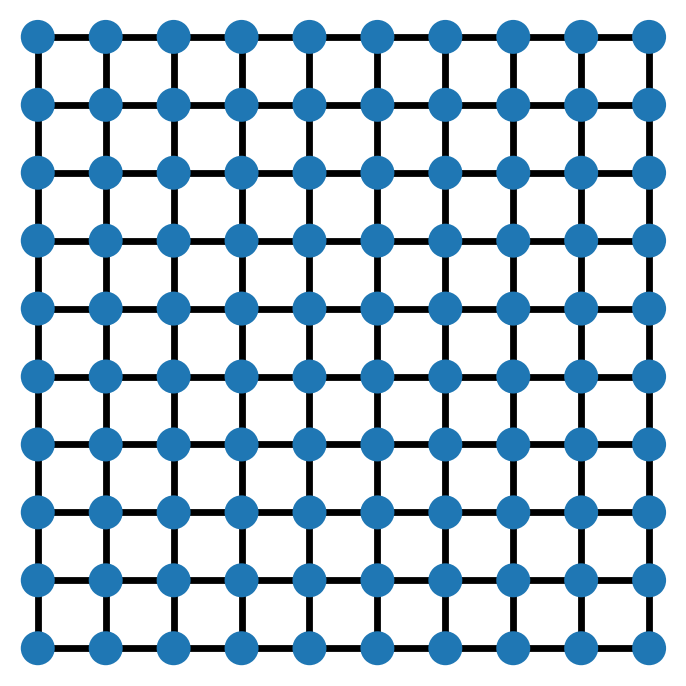

In [3]:
# Define the scattering region
for i in range(L):
    for j in range(W):
        # On-site Hamiltonian
        syst[lat(i, j)] = 4 * t

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.axis('off')
fig.tight_layout()
_ = kwant.plot(syst, ax=ax)
plt.savefig("./figures/" + "syst1" + ".png", dpi=300)

# iterating over the whole lattice
for i in range(L):
    for j in range(W):
        # Hopping in y-direction
        if j > 0:
            syst[lat(i, j), lat(i, j - 1)] = -t

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.axis('off')
fig.tight_layout()
_ = kwant.plot(syst, ax=ax)
plt.savefig("./figures/" + "syst2" + ".png", dpi=300)



# iterating over the whole lattice
for i in range(L):
    for j in range(W):
        # Hopping in x-direction
        if i > 0:
            syst[lat(i, j), lat(i - 1, j)] = -t
            
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.axis('off')
fig.tight_layout()
_ = kwant.plot(syst, ax=ax)
plt.savefig("./figures/" + "syst3" + ".png", dpi=300)

## Attach leads (tight binding systems with translational symmetry).

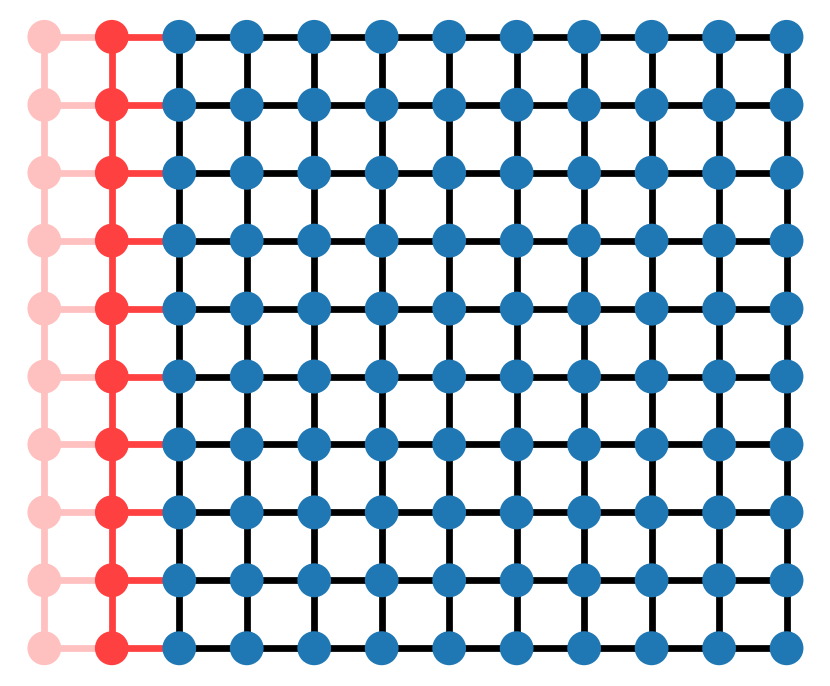

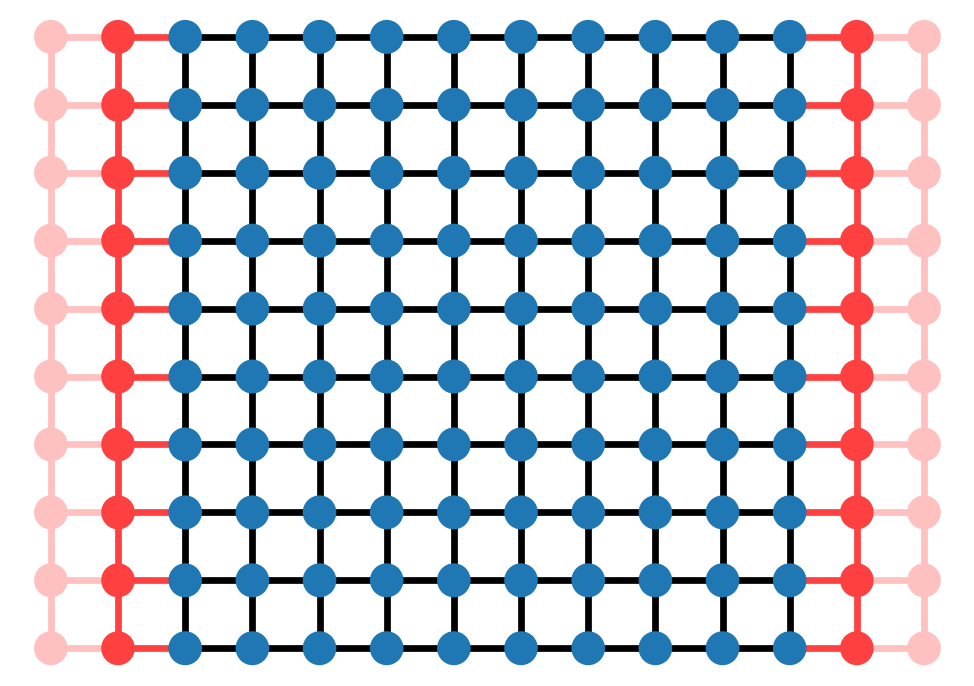

In [4]:
#utilising translational simmetry for building the lead
sym_lead = kwant.TranslationalSymmetry((-a, 0))
lead = kwant.Builder(sym_lead)

#iterating over the region of lead
for j in range(W):
    #define on site
    lead[lat(0, j)] = 4 * t
    #define hopping
    if j > 0:
        lead[lat(0, j), lat(0, j - 1)] = -t
    lead[lat(1, j), lat(0, j)] = -t

# attach lead to the system
syst.attach_lead(lead)

fig, ax = plt.subplots(1,1, figsize=(12,10))
ax.axis('off')
fig.tight_layout()
_ = kwant.plot(syst, ax=ax)
plt.savefig("./figures/" + "syst4" + ".png", dpi=300)

# reversing the lead and attaching to the system
syst.attach_lead(lead.reversed())

fig, ax = plt.subplots(1,1, figsize=(14,10))
ax.axis('off')
fig.tight_layout()
_ = kwant.plot(syst, ax=ax)
plt.savefig("./figures/" + "syst5" + ".png", dpi=300)

In [5]:
# reversing the lead and attaching to the system
syst.attach_lead(lead.reversed())

# finalizing the system
syst = syst.finalized()
syst